# Feature Extraction and Price Prediction for Mobile Phones

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Processed_Flipdata.csv")
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [5]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [6]:
df.shape

(541, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [8]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [10]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

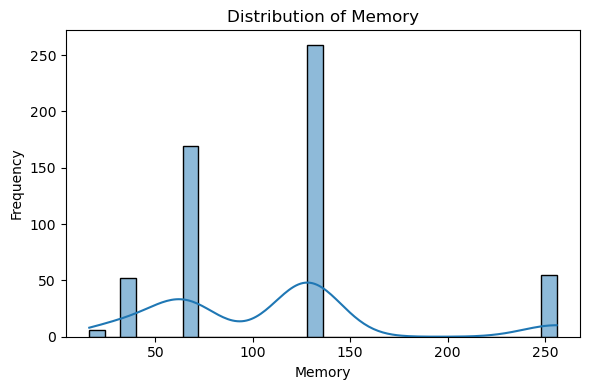

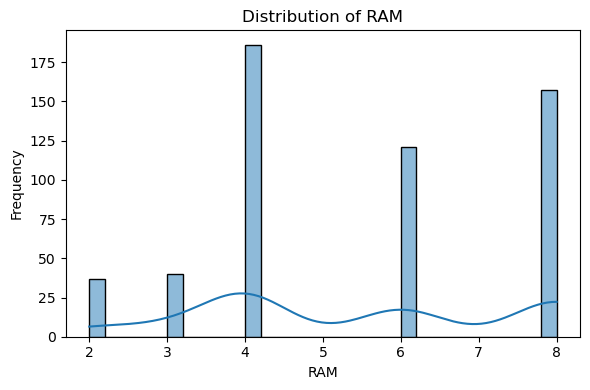

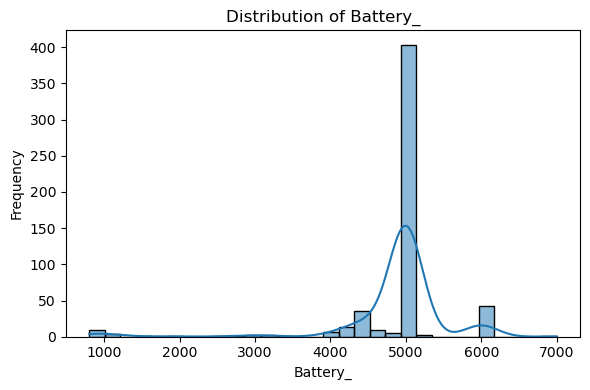

In [12]:
numerical_columns = ['Memory','RAM','Battery_']
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True , bins = 30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='AI Lens', ylabel='count'>

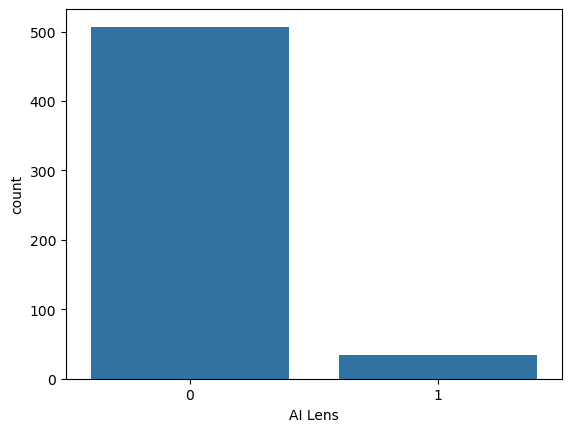

In [13]:
sns.countplot(x = df['AI Lens'])

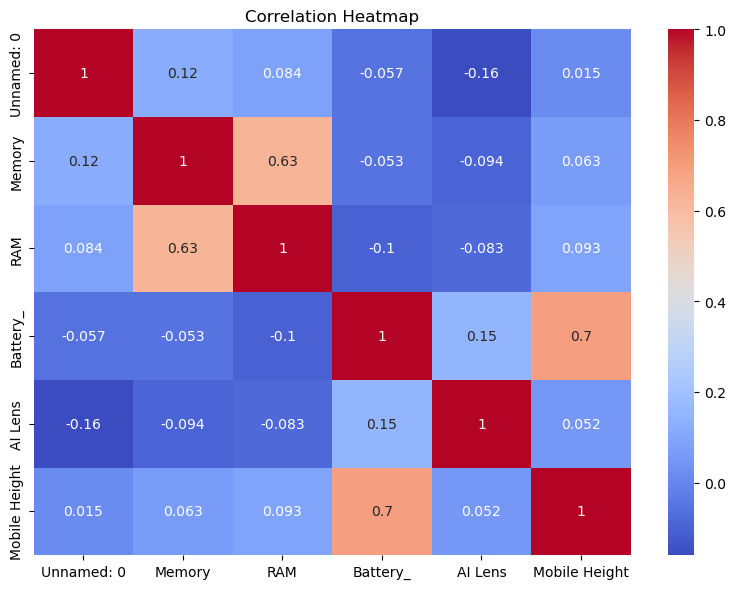

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# DATA Cleaning and Preprocessing

In [16]:
df_cleaned = df.copy()

In [19]:
df_cleaned.drop_duplicates(inplace=True)

In [28]:
df_cleaned.drop(["Colour"],axis=1,inplace=True)

In [21]:
df_cleaned.shape

(541, 12)

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery        541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor      541 non-null    object 
 10  Price          541 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


In [30]:
df_cleaned.rename(columns={
    'Battery_': 'Battery',
    'Processor_': 'Processor',
    'Prize':'Price'
}, inplace=True)


# Preprocessing
## Convert Categorical data into numerical data:
## Encode categorical features using one hot encoding and label encoding¶


In [58]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

le = LabelEncoder()
df_cleaned['Model'] = le.fit_transform(df_cleaned['Model'])

#df_cleaned = pd.get_dummies(df_cleaned,columns = ['Processor'],drop_first = True)

df_cleaned['Rear Camera']=df_cleaned['Rear Camera'].replace('[MP]','',regex=True).astype(int)
df_cleaned['Front Camera']=df_cleaned['Front Camera'].replace('[MP]','',regex=True).astype(int)
df_cleaned['Prize']=df_cleaned['Prize'].astype(int)

df_cleaned.drop(["Price"],axis=1,inplace=True)

In [61]:
df_cleaned = df_cleaned.astype(int)

In [62]:
df_cleaned.columns

Index(['Unnamed: 0', 'Model', 'Memory', 'RAM', 'Battery', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height',
       'Processor_2GHz, Quad Core ',
       ...
       'Processor_Unisoc T606', 'Processor_Unisoc T610',
       'Processor_Unisoc T612', 'Processor_Unisoc T612 processor',
       'Processor_Unisoc T616', 'Processor_Unisoc Tiger T612 (12 nm)',
       'Processor_Unisoc Tiger T616', 'Processor_ios',
       'Processor_snapdragon 888', 'Prize'],
      dtype='object', length=132)

# Feature and Target Selection

In [65]:
# split data
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(['Model','Prize'],axis=1)
y = df_cleaned['Prize']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Model Traing(Randon forest)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1703.149633027523
R² Score: 0.8569992176816006


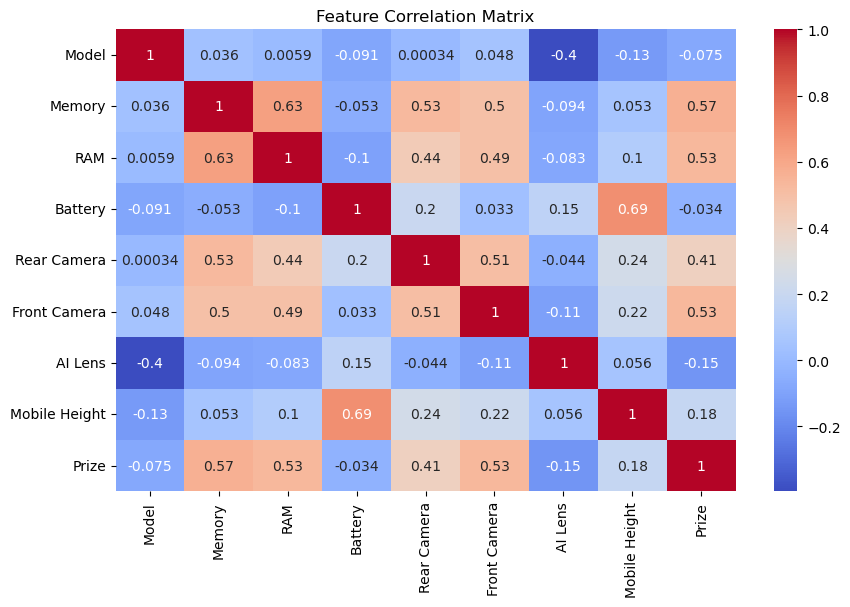

In [73]:
# Visualization - Correlation Matrix
feature_corr = df_cleaned[['Model','Memory','RAM','Battery','Rear Camera','Front Camera','AI Lens','Mobile Height','Prize']]

plt.figure(figsize=(10, 6))
sns.heatmap(feature_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


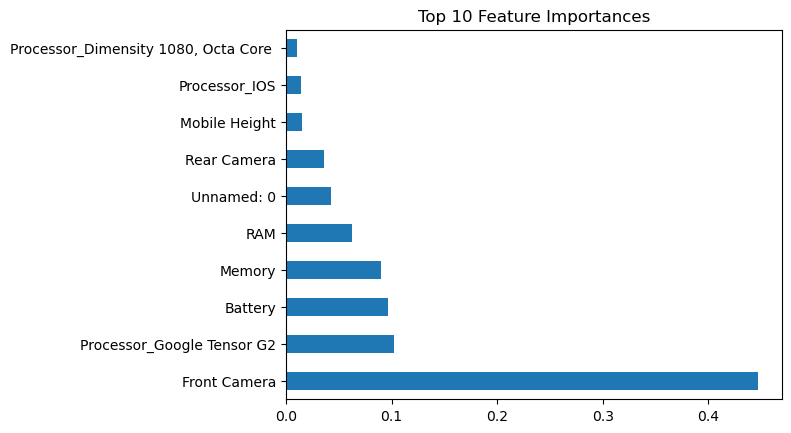

In [74]:
# Visualization - Feature Importance

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

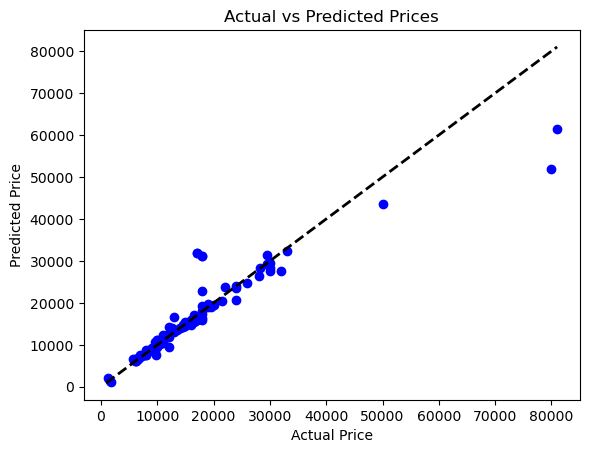

In [75]:
#Actual vs Predicted Price
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


model_1 = GradientBoostingRegressor(random_state = 42)
model_1.fit(X_train,y_train)

gra_pred = model_1.predict(X_test)

mse = mean_squared_error(y_test,gra_pred)
r2 = r2_score(y_test,gra_pred)

print("MAE:", mse)
print("R² Score:", r2)

MAE: 23103477.410508662
R² Score: 0.8323743220692246


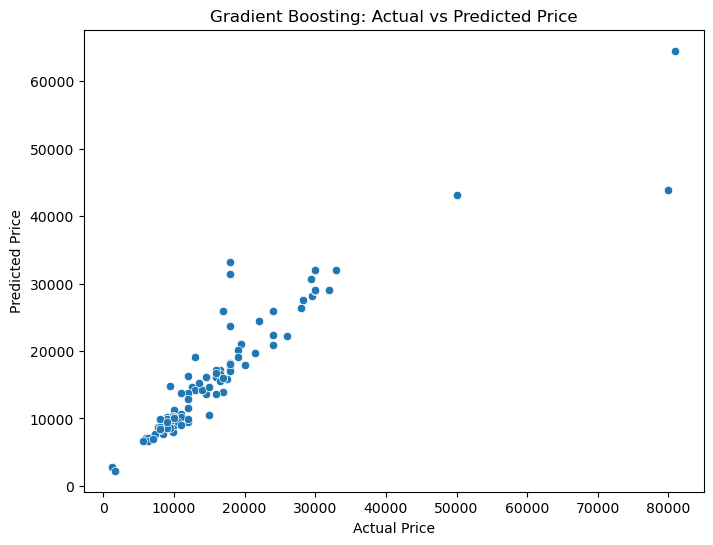

In [78]:
# visualize actual vs predicted

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=gra_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Price")
plt.show()

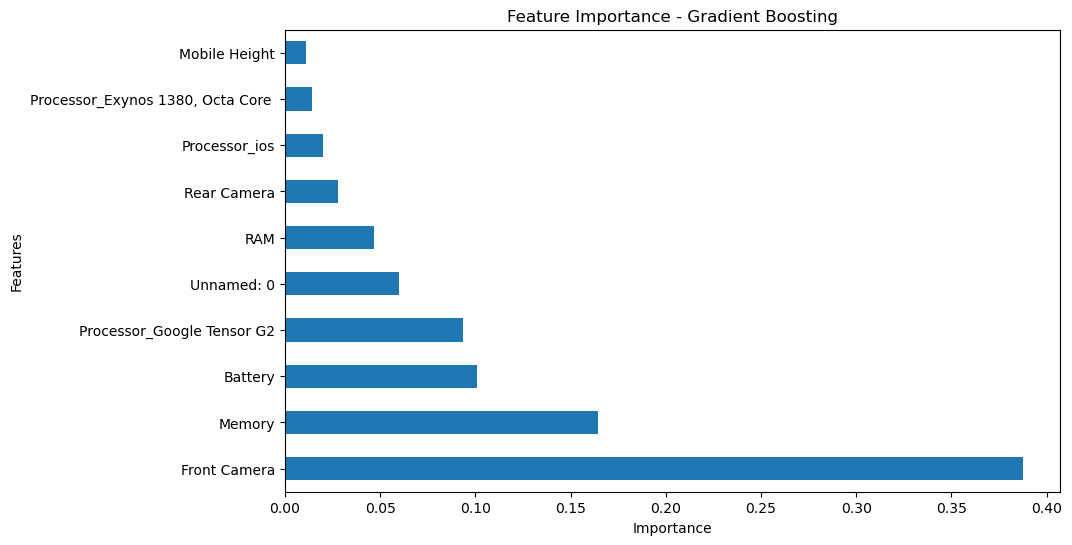

In [81]:
# Plot feature importance
plt.figure(figsize=(10,6))
feat_importance = pd.Series(model_1.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
model_2.fit(X_train,y_train)

y_pred = model_2.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE:", mse)
print("R² Score:", r2)


MAE: 8.003206287613117e+23
R² Score: -5806670812986748.0


In [89]:
from sklearn.tree import DecisionTreeRegressor

model_3 = DecisionTreeRegressor(random_state = 42)
model_3.fit(X_train,y_train)

decision_pred = model_3.predict(X_test)

mse = mean_squared_error(y_test,decision_pred)
r2 = r2_score(y_test,decision_pred)

print("MAE:", mse)
print("R² Score:", r2)

MAE: 14659455.403669724
R² Score: 0.893639338075644


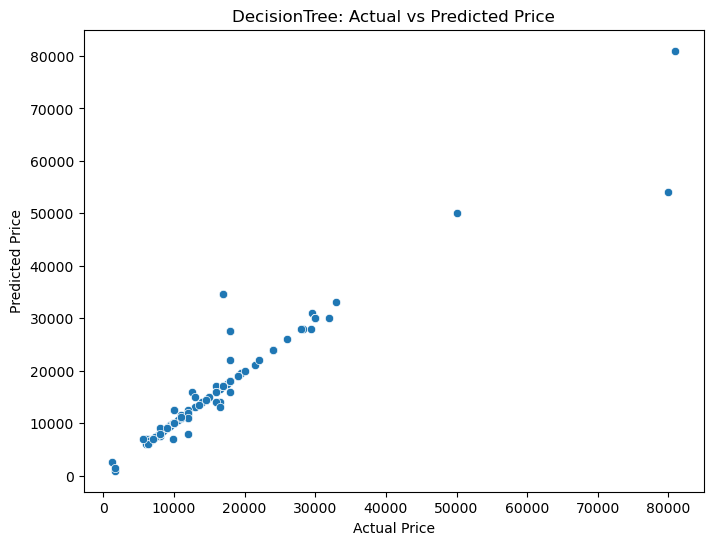

In [91]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=decision_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("DecisionTree: Actual vs Predicted Price")
plt.show()

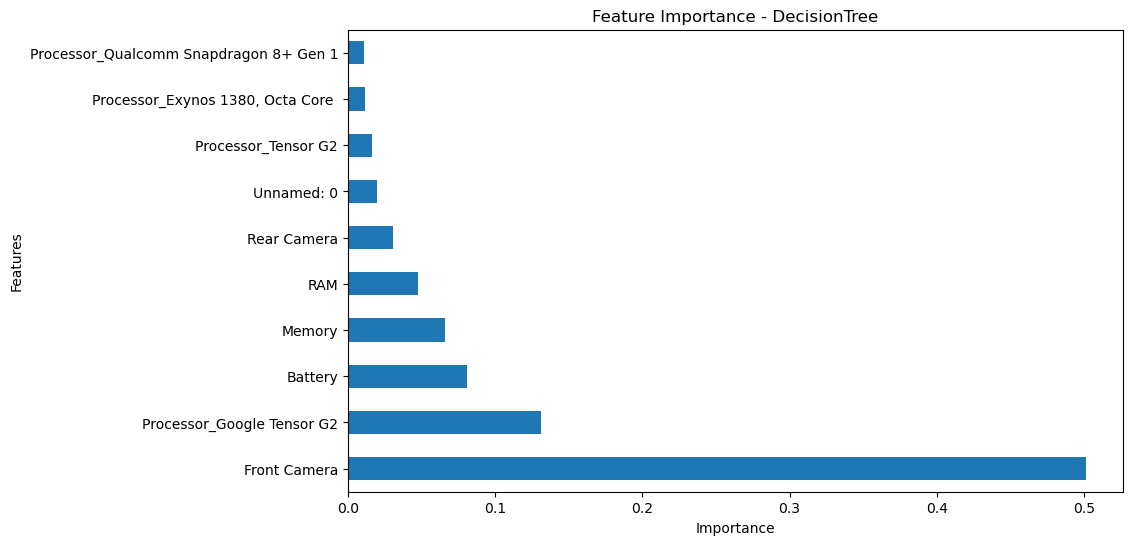

In [92]:
# Plot feature importance
plt.figure(figsize=(10,6))
feat_importance = pd.Series(model_3.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance - DecisionTree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Use statistical methods

In [93]:
from scipy.stats import pearsonr

In [100]:
# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target

selected_features = ['Model','Memory','RAM','Battery','Rear Camera',
                     'Front Camera','AI Lens','Mobile Height',
                     'Processor_Unisoc T606']
# Calculate Pearson correlation
correlatios = {
    feature:pearsonr(df_cleaned[feature],df_cleaned['Prize'])[0] 
    for feature in selected_features  
}
# Convert to DataFrame for display
# Convert to DataFrame for display
correlation_df = pd.DataFrame(list(correlatios.items()), columns=['Feature', 'Pearson Correlation'])

# Show the results
correlation_df.sort_values(by='Pearson Correlation', ascending=False)


,Feature,Pearson Correlation
1,Memory,0.566660
5,Front Camera,0.532321
2,RAM,0.532024
4,Rear Camera,0.410367
7,Mobile Height,0.183423
3,Battery,-0.034297
0,Model,-0.075163
8,Processor_Unisoc T606,-0.082663
6,AI Lens,-0.153691


In [101]:
from scipy.stats import chi2_contingency
import pandas as pd

# Define significance level
alpha = 0.05

# Bin the target variable
df_cleaned['Prize_bin'] = pd.qcut(df_cleaned['Prize'], q=4, labels=False)

# Run Chi-Square test
chi2_results = {}

for col in selected_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['Prize_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
RAM,458.111158,0.0,Reject Null (Keep Feature)
Memory,430.69013,0.0,Reject Null (Keep Feature)
Front Camera,499.336203,0.0,Reject Null (Keep Feature)
Model,1454.941642,0.0,Reject Null (Keep Feature)
Rear Camera,458.34162,0.0,Reject Null (Keep Feature)
Battery,337.09161,0.0,Reject Null (Keep Feature)
AI Lens,37.501477,0.0,Reject Null (Keep Feature)
Mobile Height,79.122629,0.000001,Reject Null (Keep Feature)
Processor_Unisoc T606,14.882068,0.00192,Reject Null (Keep Feature)


In [3]:
#Model Comparison Chart (RMSE)
import matplotlib.pyplot as plt

# Define model names and their RMSE scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest','GradientBoostingRegressor']
rmse_scores = [80032, 14659, 17031, 23103]  

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores)
plt.title("Model Comparison Based on RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.tight_layout()

# Save the chart image
chart_path = "Model_Comparison_RMSE.png"
plt.savefig(chart_path)
plt.close()

